In [133]:
# Relevant imports.
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

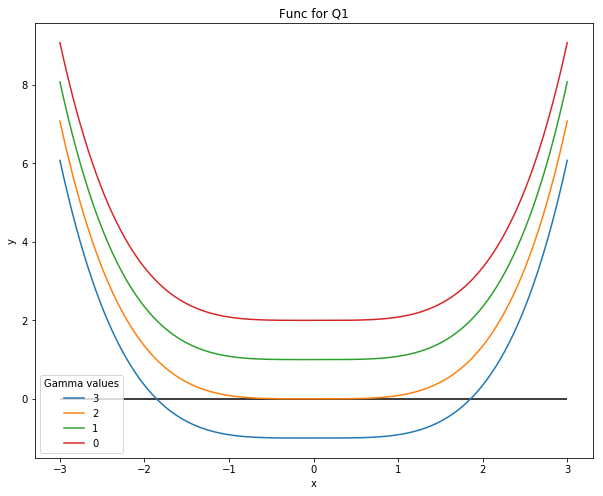

In [138]:
# Q1.
gammas = [0, 1, 2, 3]
x = np.linspace(-3, 3, 1000)

def objfunc1(x, p=3):
    return np.cosh(x)+np.cos(x)-p

plt.plot(x, objfunc1(x), x, objfunc1(x, p=2),
        x, objfunc1(x, p=1),
        x, objfunc1(x, p=0))
plt.hlines(y=0, xmin=-3, xmax=3)
plt.title("Func for Q1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend([3, 2, 1, 0], title="Gamma values")

In [147]:
# Solving Q1.
def bisect(f, bracket, args=[], atol=1e-8, nmax=100):
    """
        This method finds the roots of a function f(x) = 0 
        using the Bisection Method.
        Inputs:
            f : The function to find the root for.
            
            bracket : The bracket in which to find the root.
            
            args : A list of extra arguments that are required to fully
                   specify the objective function.
                   
            atol : Absolute tolerance in the independent variable.
            
    """
    # Lower and upper bounds on independent variables.
    lb, ub = bracket[0], bracket[1]
    # Number of iterations. This is constant for the bisection method.
    niter = int(np.ceil(np.log2(np.abs((ub-lb)/atol**0.5))))
    
    # Debugging print.
    # print(lb, ub, niter)
    
    # Function values at bounds.
    fub, flb = f(ub, *args), f(lb, *args)
    # Checking if valid bracketing interval.
    if f(ub, *args)*f(lb, *args) > 0:
        print("No sign change of function in bracket. "\
              "No proof of possible root.")
        return np.nan
    else:
        
        # Main bisection loop.
        for i in range(niter):
            # Midpoint in indep. var.
            argmid = (ub+lb)/2
            # Evaluating function at midpoint.
            fmid = f(argmid, *args)
            # Bisecting to either side as necessary.
            if fmid*fub < 0:
                lb = argmid
                # Evaluating function at new lower bound,
                # if necessary.
                flb = f(lb, *args)
            else:
                ub = argmid
                # Evaluating function at new upper bound,
                # if necessary.
                fub = f(ub, *args)
                
        # Using a simple linear interp formula to estimate the root
        # in the final bracketing interval.
        # Assuming that the function can be locally estimated to be
        # linear, we can use the following formula.
        # (fub-flb)/(ub-lb) = (fub-0)/(xub-xroot)
        # This is equivalent to a single-pass Newton's method
        # using a numerical approximation of the derivative.
        xroot = ub - (ub-lb)/(fub-flb)*fub
        print("Converged to root in", niter, " iterations.")
        print("Root value:", xroot)
        print("Function value at root:", f(xroot, *args))
        # print("Function value at midpoint:", f((lb+ub)/2, *args))
        return xroot
        
        
        


Converged to root in 14  iterations.
Root value: 1.85792082871
Function value at root: -9.58470636192e-10
Converged to root in 14  iterations.
Root value: -1.85792082871
Function value at root: -9.58470636192e-10


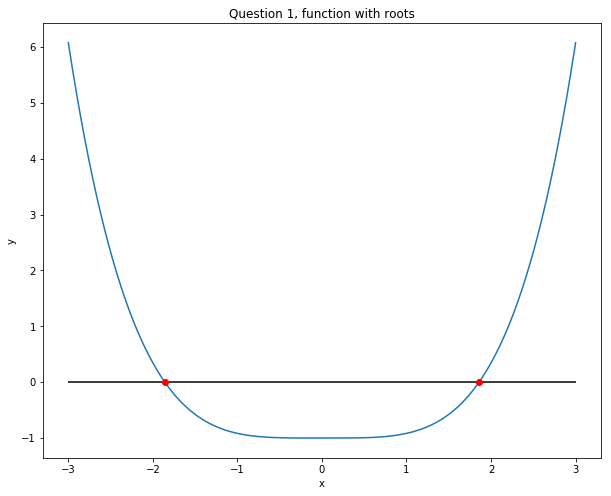

In [148]:
# Solving Q1 using the (improved) bisection method.
# Finding both roots.
root1 = bisect(objfunc, [1, 2], args=[3])
root2 = bisect(objfunc, [-2, -1], args=[3])

# Plotting both roots.
plt.plot(x, objfunc(x, p=3), root1, objfunc(root), 'ro',
         root2, objfunc(root2), 'ro')
plt.hlines(y=0, xmin=-3, xmax=3)
plt.title("Question 1, function with roots")
plt.xlabel("x")
plt.ylabel("y")

In [61]:
# Solving Q3.
def fproot(gfunc, x0, args=[], atol=1e-10, nmax=100):
    # Ideally, a value that will never be encountered.
    xk = -7e200
    res = xk-x0
    # Number of iterations.
    niter = 0
    # Break flag. Used to break out of loop.
    bflag = 0
    
    while np.abs(res) > atol:
        xk = gfunc(x0, *args)
        res = xk - x0
        x0 = xk
        niter += 1
        if niter >= nmax:
            bflag = -1
            break
    if bflag == 0:
        niter += 1
        xroot = xk
        print("Converged to root in", niter, " iterations.")
        print("Root value:", xroot)
        print("Function value at root:", xroot - gfunc(xroot, *args))
        return xroot
    else:
        print("Max iterations reached. Function did not converge!")
        


Converged to root in 58  iterations.
Root value: 2.61786661324
Function value at root: 5.36410915686e-11
Converged to root in 72  iterations.
Root value: 1.48796206525
Function value at root: -6.38815667031e-11
Converged to root in 21  iterations.
Root value: -0.539835276909
Function value at root: -7.78088704578e-12
The three roots are 2.61786661324 1.48796206525 -0.539835276909


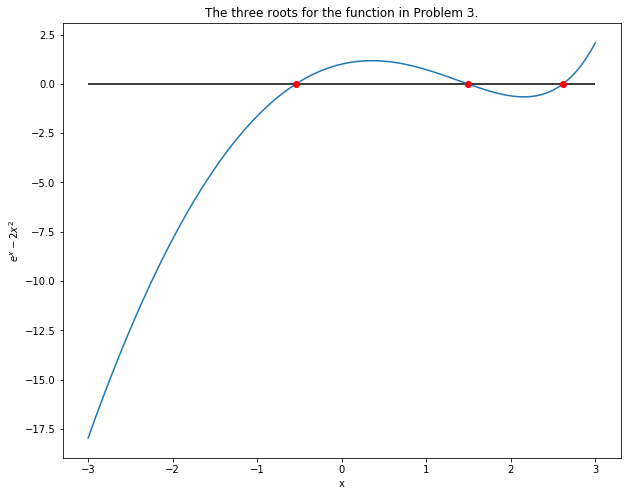

In [110]:
# Solving Q3 using fproot.
# The function g(x) for e^x - 2x^2 = 0
def objfunc3(x):
    return np.exp(x)-2*x*x

# This function was VERY DIFFICULT to find.
# This g is used to find the root at ~2.6
#    e^x - 2*x^2 = 0
# => e^x/(2*x^2) = 1
# => e^x/(2*x^3) = 1/x
# => x = (2*x^3/e^x)

# This function is unstable too far away from the root.
# Because g'(x) ~0.5 < x < ~2 is >1.
# So the method will not work there.
def p3_g1(x):
    return np.sqrt(2*x*x*x*x/np.exp(x))

def p3_g2(x):
    return np.sqrt(np.exp(x)/2)

def p3_g3(x):
    return -np.sqrt(np.exp(x)/2)


plt.plot(x, objfunc3(x))
plt.hlines(y=0, xmin=-3, xmax=3)


p3_root1 = fproot(p3_g1, 3)
p3_root2 = fproot(p3_g2, 1)
p3_root3 = fproot(p3_g3, -2.8)
plt.plot(p3_root2, objfunc3(p3_root2), 'ro',
         p3_root3, objfunc3(p3_root3), 'ro', 
         p3_root1, objfunc3(p3_root1), 'ro')
plt.title("The three roots for the function in Problem 3.")
plt.xlabel("x")
plt.ylabel("$e^x - 2x^2$")
print("The three roots are", p3_root1, p3_root2, p3_root3)


In [143]:
# Solving Q5.
def newton(func, x0, funcderiv = 0, args=[], atol=1e-10, nmax=100):
    xk = -7e200
    res = xk-x0
    # Number of interations.
    niter = 0
    # Break flag, Used to break out of loop.
    bflag = 0
    
    def fprime(loc, h=1e-4):
        # loc = x-value at which to calculate derivative.
        return (func(loc+h, *args)-func(loc-h, *args))/(2*h)
    
    # If derivative is not supplied, replace with numerical derivative
    # approximation.
    if not funcderiv:
        funcderiv = fprime
        
    # Main Newton loop.
    while np.abs(res) > atol:
        
        # Using g = x - f/f'
        # This makes Newton's Method a special case of
        # fixed point methods.
        xk = x0 - func(x0, *args)/funcderiv(x0)
        res = xk - x0
        x0 = xk
        niter += 1
        if niter >= nmax:
            bflag = -1
            break
    if bflag == 0:
        niter += 1
        xroot = xk
        print("Converged to root in", niter, " iterations.")
        print("Root value:", xroot)
        print("Function value at root:", func(xroot, *args))
        return xroot
    else:
        print("Max iterations reached. Function did not converge!")


In [145]:
# Solving Q5 using Newton's method.
# Objective function for question 5.
def objfunc5(x):
    return x*x-7

def objfunc5deriv(x):
    return 2*x

# Trying with x0 = 500
newton(objfunc2, 500, funcderiv=objfunc5deriv)

# Trying with x0 = 2
newton(objfunc2, 2)

Converged to root in 14  iterations.
Root value: 2.6457513110645907
Function value at root: 8.881784197001252e-16
Converged to root in 6  iterations.
Root value: 2.6457513110645907
Function value at root: 8.881784197001252e-16


2.6457513110645907

In [128]:
# Q6, implementing a secant method.

def secant(func, init_x, args=[], atol=1e-10, nmax=100):
    xk = -7e200
    x0, x1 = init_x[0], init_x[1]
    res = xk-x0
    # Number of interations.
    niter = 0
    # Break flag, Used to break out of loop.
    bflag = 0
    
    while np.abs(res) > atol:
        # x_k = x_(k-1) - 
        # ( x_(k-1)-x_(k-2))*f(x_(k-1) )/( f(x_(k-1))-f(x_(k-2)) )
        xk = x1 - func(x1, *args)*(x1-x0)/(func(x1, *args)
                                           - func(x0, *args))
        res = xk - x1
        x0 = x1
        x1 = xk
        niter += 1
        if niter >= nmax:
            bflag = -1
            break
    if bflag == 0:
        niter += 1
        xroot = xk
        print("Converged to root in", niter, " iterations.")
        print("Root value:", xroot)
        print("Function value at root:", func(xroot, *args))
        return xroot
    else:
        print("Max iterations reached. Function did not converge!")

In [146]:
# Solving Q6 using newton and secant.
# Objective function for question 6.
def objfunc6(x):
    return x + np.log(x)

newton(objfunc6, 2)
secant(objfunc6, [2, 3])

Converged to root in 8  iterations.
Root value: 0.56714329041
Function value at root: -1.11022302463e-16
Converged to root in 10  iterations.
Root value: 0.56714329041
Function value at root: -1.11022302463e-16


0.56714329040978384

We see that Newton's method converges faster than the Secant method.